# Introduction to Neural Networks

- DSI Workshop by Ishan Kumthekar

## WHAT ARE NEURAL NETWORKS

Neural Networks are simply a way to create a mapping from your input to a desired output.

Some well known examples are:


1) ChatGPT: input text to ouput text

2) Full Self Drive: input visual data to output driving instructions and so on



## NEURAL NETWORK STRUCTURE
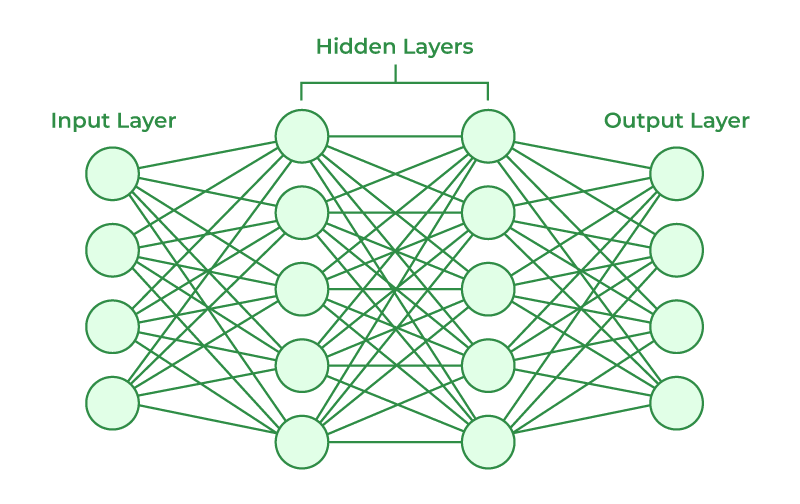



## TENSORS AND GRADIENTS

- Tensors are objects created in PyTorch that represent multi-dimensional arrays.

- Tensors will represent the parameters of our Neural Network.

- How are they different from numpy arrays? - They specifically track gradients with respect to different variables. Example y = x^2, grad dy/dx = 2x. Therefore, when x = 3, x.grad = 6

- Why do you need gradients? - When you use a preliminary neural network which is completely unoptimized, you use a loss function to optimize it. This optimization requires finding gradients w.r.t to the loss and then adjusting paramters accrodingly to make them better.

- What is a gradient? - Direction of steepest ascent of a vraibale w.r.t to another.

## LOSS FUNCTIONS

 - Loss functions indicate how far away your prediction is from the true output for a certain input.

 - YOUR GOAL? - To reduce this loss as much as possible.

 - HOW DO YOU MINIMIZE LOSS? - Remember Calculus!!! Minimizing any function requires us to calculate a derivate of it, w.r.t to its component variables.

 - We'll get to the computation of loss later

In [ ]:
# CODE EXAMPLE TO SHOW HOW GRADIENTS WORK
import torch
# SINGLE DIMENSIONAL TENSORS
x = torch.tensor(3.0, requires_grad=True)

y = x**2
y.backward() ## .backward() is how to calculate all gradients of all variables that y depends on
print("Gradient of a single dimensional x w.r.t y: ", x.grad)

## MULTI-DIMENSIONAL TENSORS
x = torch.tensor([[1., 2., 3.], [3., 2., 1.]], requires_grad=True)
print("Shape of x is the dimensions of x: ",x.shape)

y = x.sum() #sum of all elements in X
y.backward()
print("Gradient of x w.r.t y when it is a 2x3 matrix: ", x.grad)


Gradient of a single dimensional x w.r.t y:  tensor(6.)
Shape of x is the dimensions of x:  torch.Size([2, 3])
Gradient of x w.r.t y when it is a 2x3 matrix:  tensor([[1., 1., 1.],
        [1., 1., 1.]])


## Gradient of Indirect Connections

Now as you can see in the Neural Network picture, that all neurons are not connected directly to the ouput. Then how do we figure out how much the output changes w.r.t each individual neurons value?

The answer is chain derivatives:

- They are as follows: imagine y = x^2 and z = 3y. How do we calculate the gradient of z w.r.t x? This quantity can be rewritten as dz/dx or dz/dy*dy/dx. Do we know dy/dx? Yes. Do we know dz/dy? Yes

Thus we can effectively calculate the influence of any given neuron in the network on the output or the loss using chain derivatives.

In [ ]:
# CODE EXAMPLE FOR ATTENDEES

x = torch.tensor(3.0, requires_grad=True)
y = x**2
z = 3*y


# Can you calculate the gradient of z w.r.t x without using backward?

z.backward()
#print("Gradient of x w.r.t z :", x.grad)

Gradient of x w.r.t z : tensor(18.)


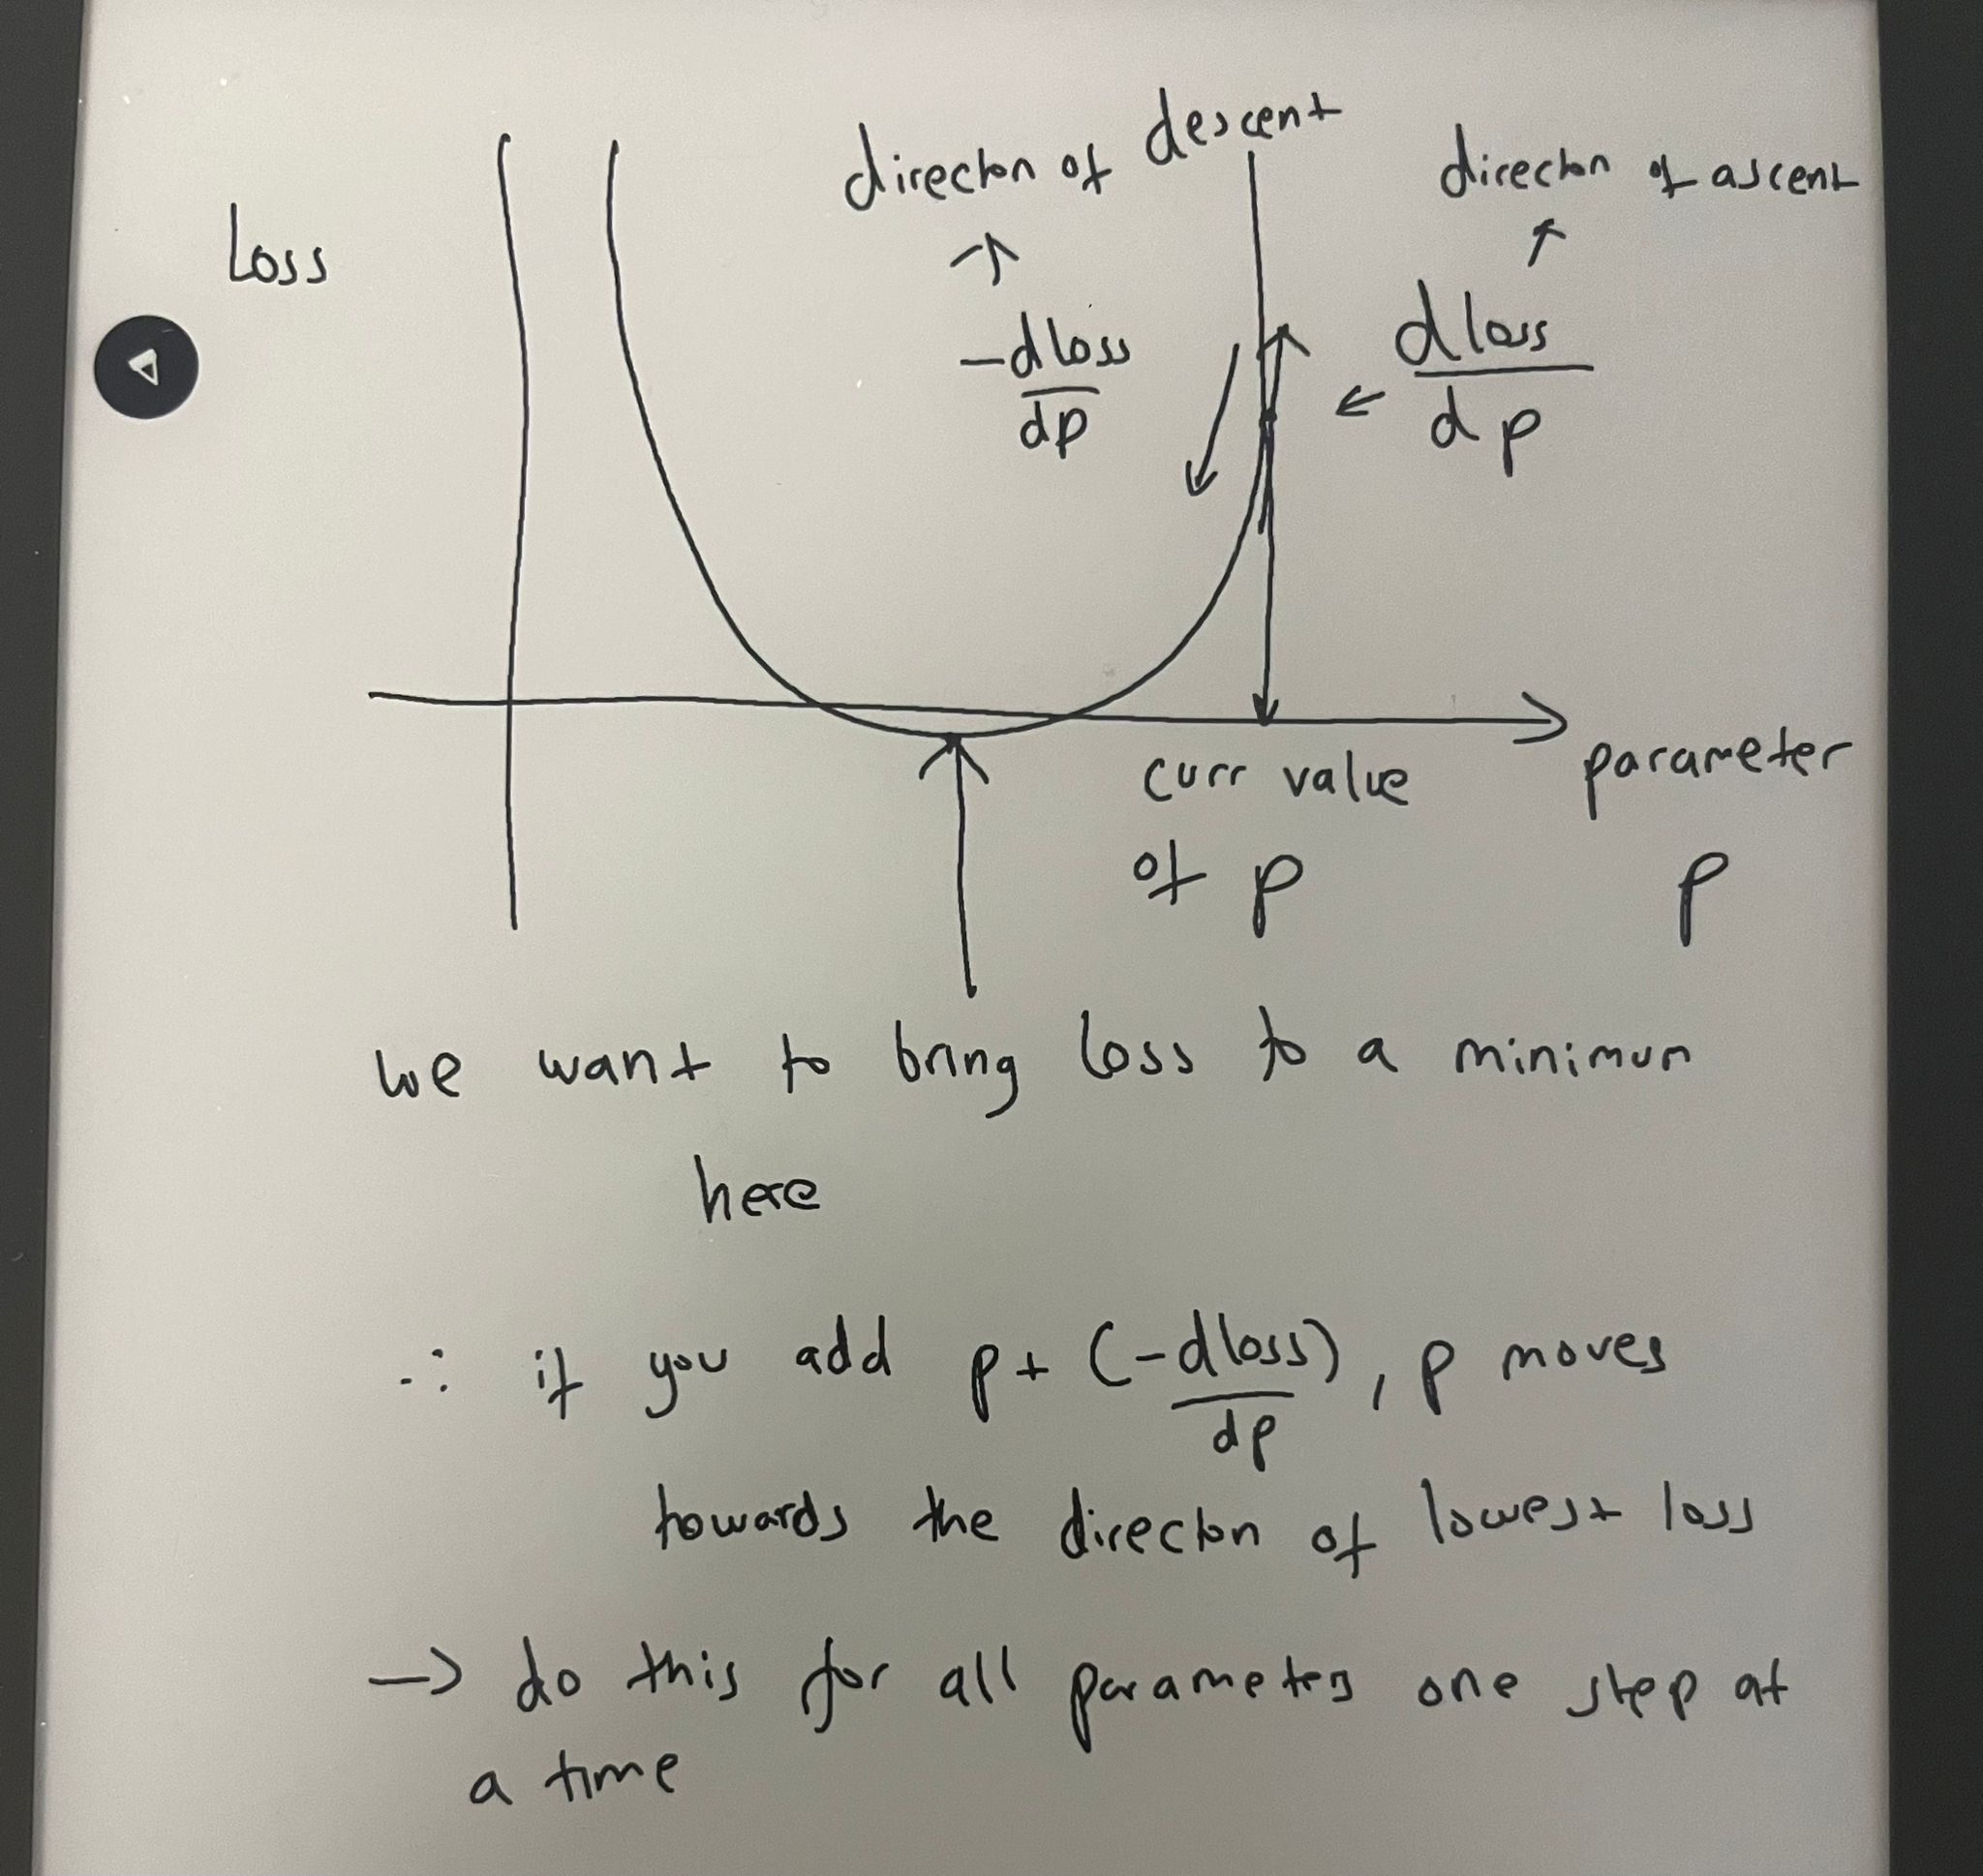

## NEURONS, LAYERS, AND FORWARD PASSES

We have been talking about neurons and layers for a while, but what exactly are they in this network.

- A layer is composed of a set number of neurons. The output from a layer is a vector made through joining all the different outputs from its component neurons.

- Example: If a layer has 10 neurons then its output will be of dimensions 1x10

- A neuron is made of a vector of real numbers. These values are in the vector are called weights because they scale the input according to their values.

- The input of a neuron at any given layer in the network is the output of the layer prior to it. Int he case of the neurons at the first layer, this is the input.

- The output of a neuron at any given layer in the network is calculated as follows:

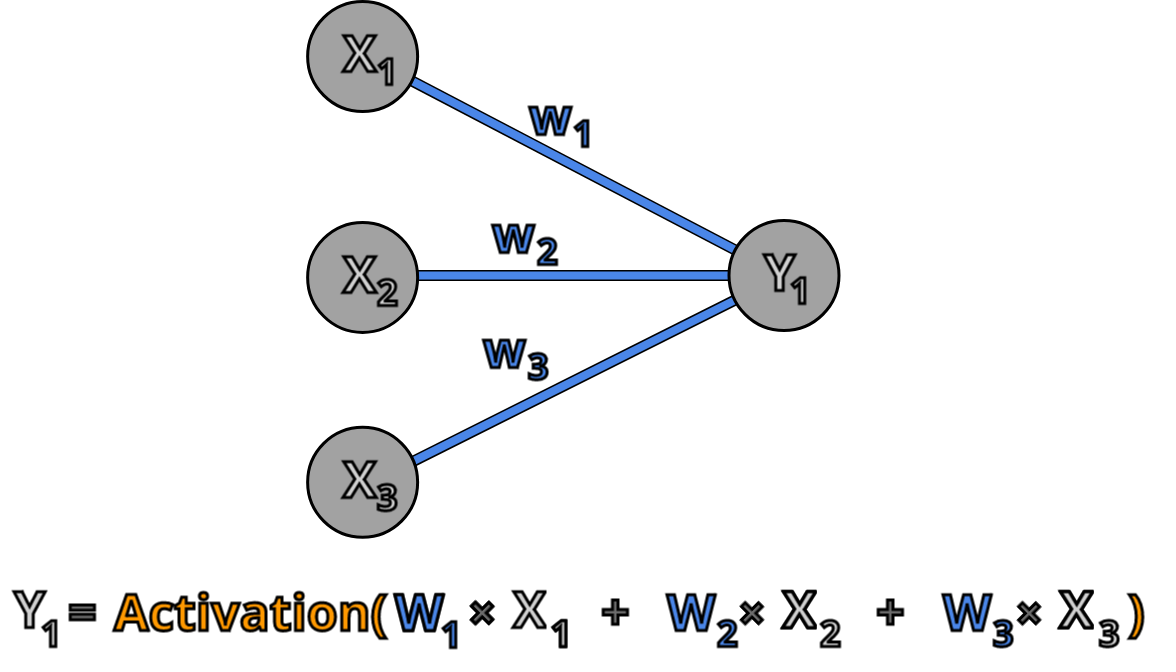

- Here the input is [x1, x2, x3] and the weights or the vector at the neuron is [w1,w2,w3]. You multiply the first position of the neuron with the first position of the input and keep doing this for all values. Then you add them and put them through an activation function.

- The activation function is important and we'll discuss it later.

- The forward pass is the process of getting the output through all of these neurons based on your initial input.




## SIMPLE NEURAL NETWORK

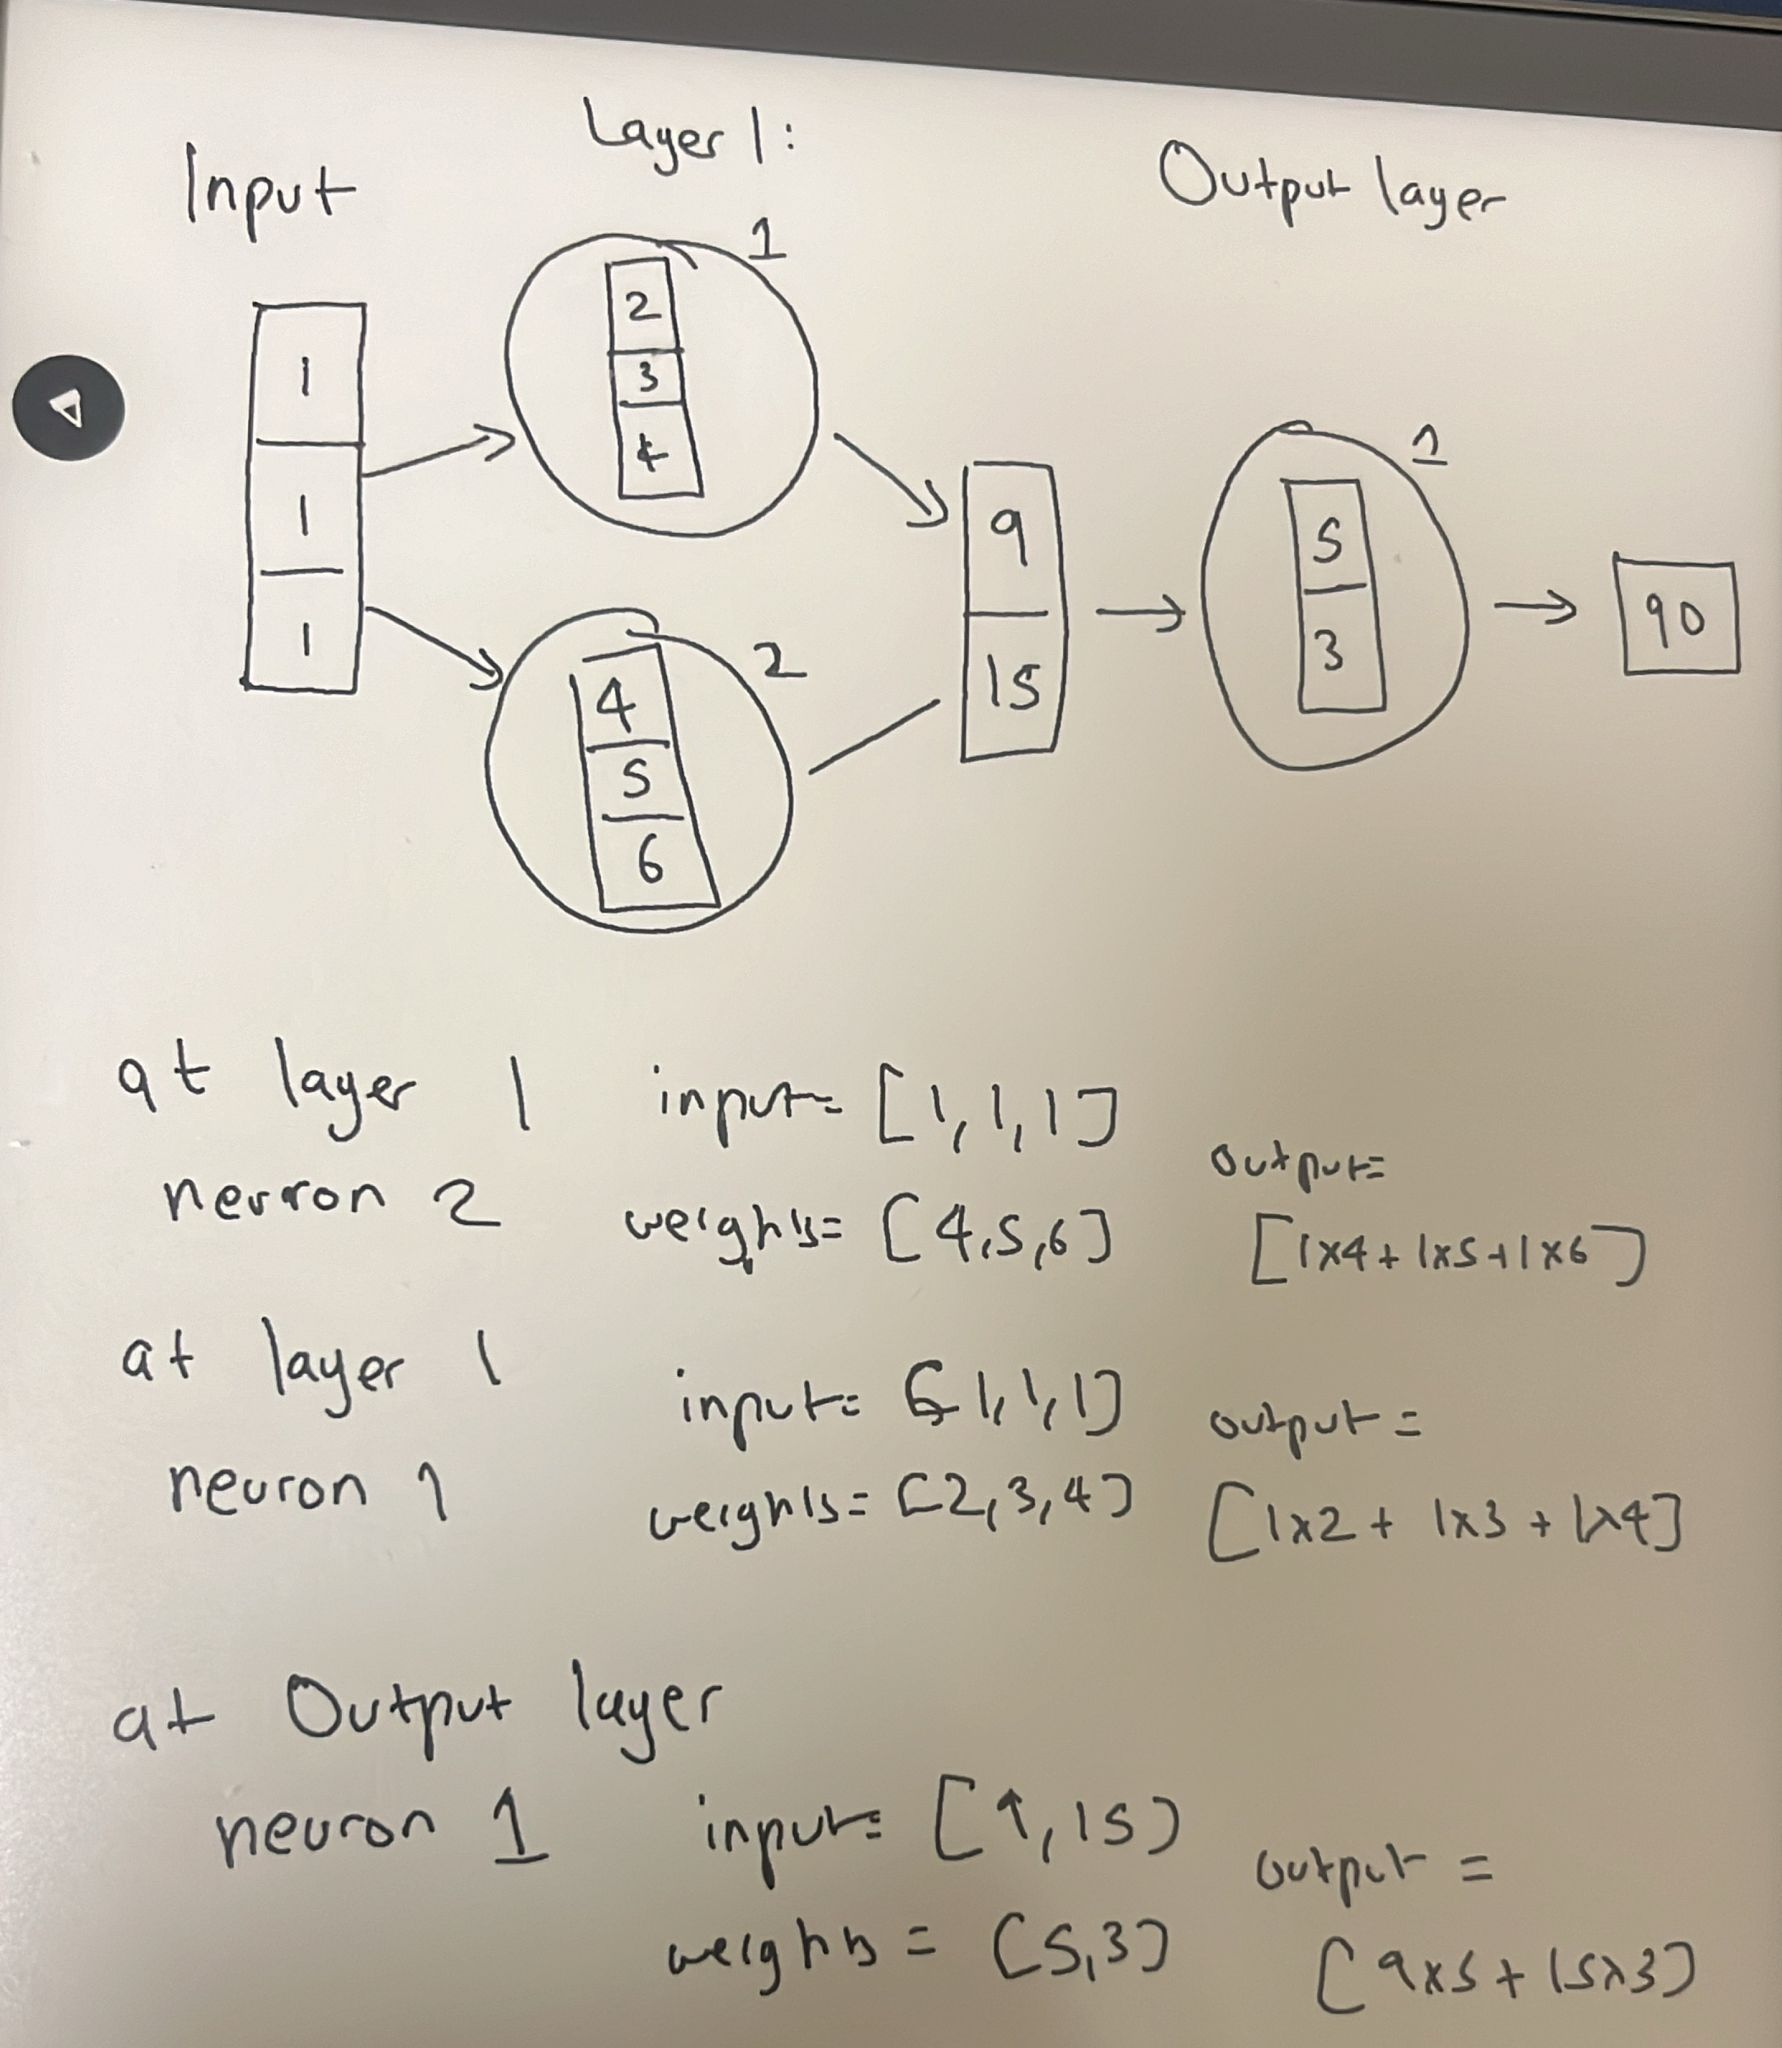

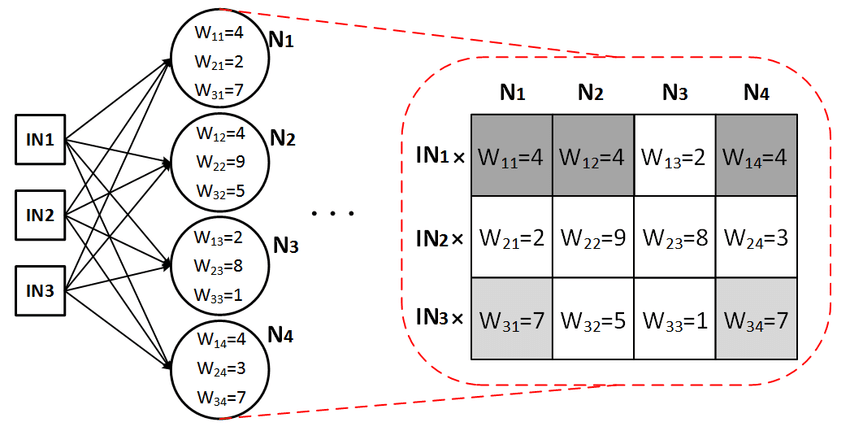

## SIMPLE NEURAL NETWORK EXAMPLE


In [ ]:
input = torch.tensor([1,1,1]).T #[3x1]

#NEURONS IN LAYER 1
neuron1_1 = torch.tensor([2,3,4])
neuron1_2 = torch.tensor([4,5,6])

#NEURONS IN OUTPUT LAYER

neurons2_1 = torch.tensor([5,3])

# NEAT TRICK, INSTEAD OF PERFORMING CALCUALTIONS AT EACH INDIVIDUAL NEURON, YOU CAN COMBINE ALL THE WEIGHTS INTO A WEIGHT MATRIX AND THEN DO CALCULATIONS
weights1=torch.tensor([[2,3,4],[4,5,6]])

layer1_output_individual = torch.tensor([torch.matmul(neuron1_1,input), torch.matmul(neuron1_2,input)])
print("Layer 1 output individual: ", layer1_output_individual)
layer1_output_weights = torch.matmul( weights1,input)
print("Layer 1 output weighted: ", layer1_output_weights)

output = torch.matmul(neurons2_1,layer1_output_weights)
print("Output: ", output)


Layer 1 output individual:  tensor([ 9, 15])
Layer 1 output weighted:  tensor([ 9, 15])
Output:  tensor(90)


<ipython-input-4-cfc77a999032>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  input = torch.tensor([1,1,1]).T #[3x1]


## ACTIVATION FUNCTIONS

Activation functions simply take the output from your neurons and put them through a NON-LINEAR function. What this means is that your neurons can represent NON-LINEAR features. This is what allows NEURAL NETWORKS to be so powerful.

You can represent many complex functions in this manner. For example:

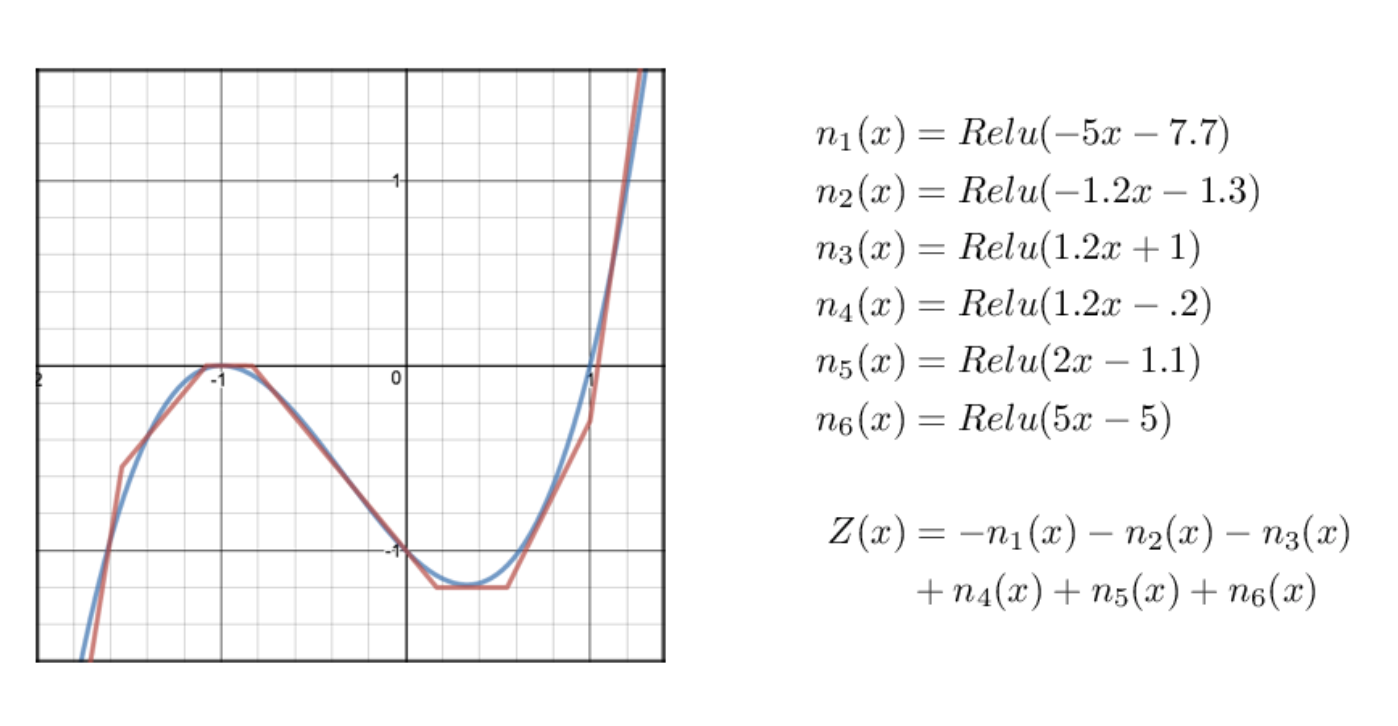

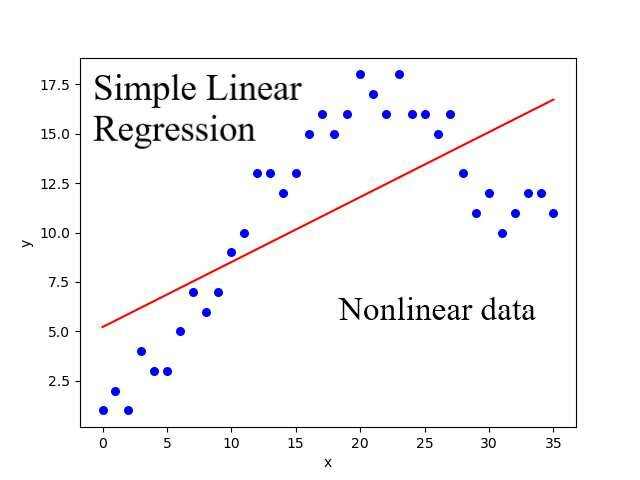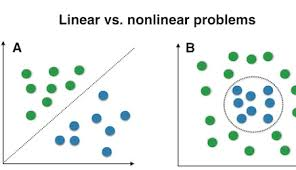

This function could never have been represented by simple lines.

- What your activation functions do in simple words is create many different small lines that are joined to one another.

- The most commonly used activation functions is RELU

- The activation functions are applied to the output of each layer

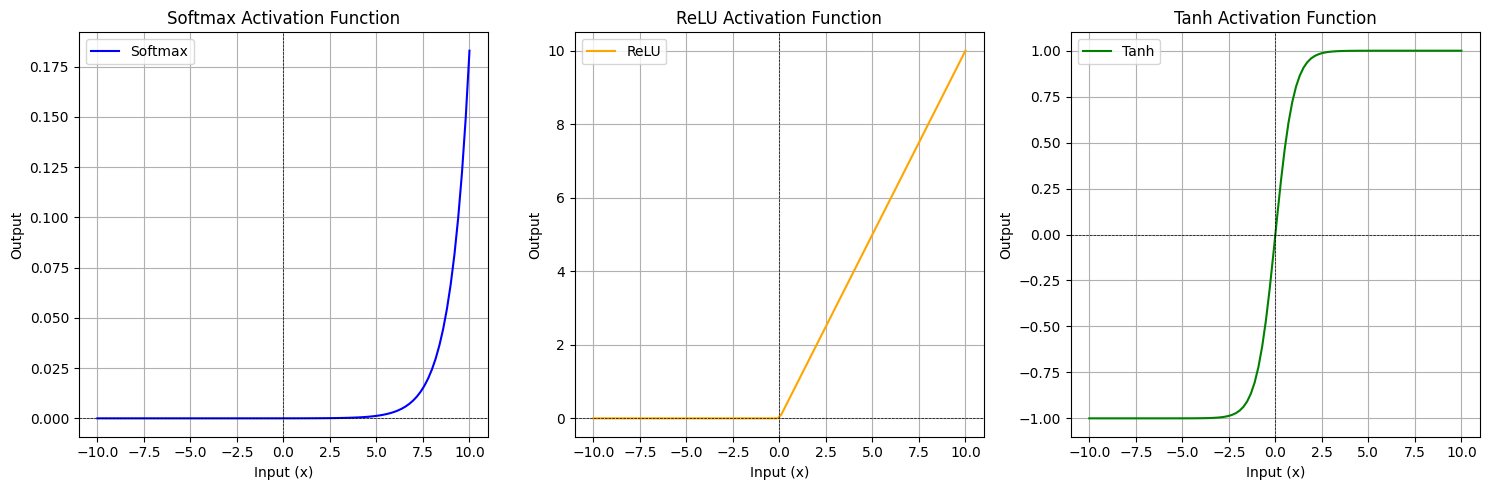

tensor([[1.3213e-02, 2.6539e-01, 7.2140e-01],
        [3.3189e-05, 2.6893e-01, 7.3103e-01]])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Define the input range
x = np.linspace(-10, 10, 100)

# Softmax function (applied across the axis)
softmax = np.exp(x) / np.sum(np.exp(x))

# ReLU function
relu = np.maximum(0, x)

# Tanh function
tanh = np.tanh(x)

# Create subplots
plt.figure(figsize=(15, 5))

# Softmax plot
plt.subplot(1, 3, 1)
plt.plot(x, softmax, label='Softmax', color='blue')
plt.title('Softmax Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()

# ReLU plot
plt.subplot(1, 3, 2)
plt.plot(x, relu, label='ReLU', color='orange')
plt.title('ReLU Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()

# Tanh plot
plt.subplot(1, 3, 3)
plt.plot(x, tanh, label='Tanh', color='green')
plt.title('Tanh Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Applying softmax as an activation layer in PyTorch
x = torch.tensor([[-1, 2, 3], [-4, 5, 6]], dtype=torch.float32)

# Apply softmax across the rows (dim=1)
x = torch.softmax(x, dim=1)
print(x)


## FINAL PIECE: TRAINING AND STOCHASTIC GRADIENT DESCENT

What we know up until now:

1) How to calculate the output of a neural network given an input

2) How to calculate the gradient of any weight w.r.t the output or a loss function.

How do we use this information to improve our neural network

- Remember, improving a neural network means to better adjust the parameter such that your network's ouput is closer to the real output


### LOSS FUNCTION

These functions are completely dependent on the type of problem your're trying to solve.

- A numeric problem where you're trying to match the stock price. Loss = L = |Real - Predicted| is completely valid

- But you can see that this doesn't translate well to classification problems. What is the distance between two classes?

In order to address this we'll look at a type of commonly used loss function called cross-entropy loss.

#### Cross Entropy

For a single data point, the Cross-Entropy Loss can be defined as:

\[
L(y, \hat{y}) = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
\]

Where:
- \(L\) is the loss.
- \(y\) is the true distribution (one-hot encoded labels).
- \(\hat{y}\) is the predicted distribution (output from the model).
- \(Ouput Size\) is the number of classes.

- **When the predicted probability (\(\hat{y}\)) for the correct class is high**, the loss will be low.
- **When the predicted probability for the correct class is low**, the loss increases significantly.
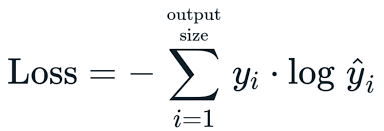


- The next step is simple, to calculate the gradient of the loss function w.r.t to each weight in the network.

- As you remember it is as simple as calling loss.backward() to update all gradients.

- However, since the gradient gives the direction of steepest ascent, we will subtract it from our original weight. This will essentially mean that we're moving our weight towards the direction of the steepest descent towards minimum loss.

### Learning Rate

The rate at which you subtract the direction of steepest descent from your parameters is called the learning rate (L.R)

Updating step=: p = p - L.R*p.grad

If L.R is too high, you might miss the minimum of the loss function, or if it is too low you may never reach the minimum of the loss function

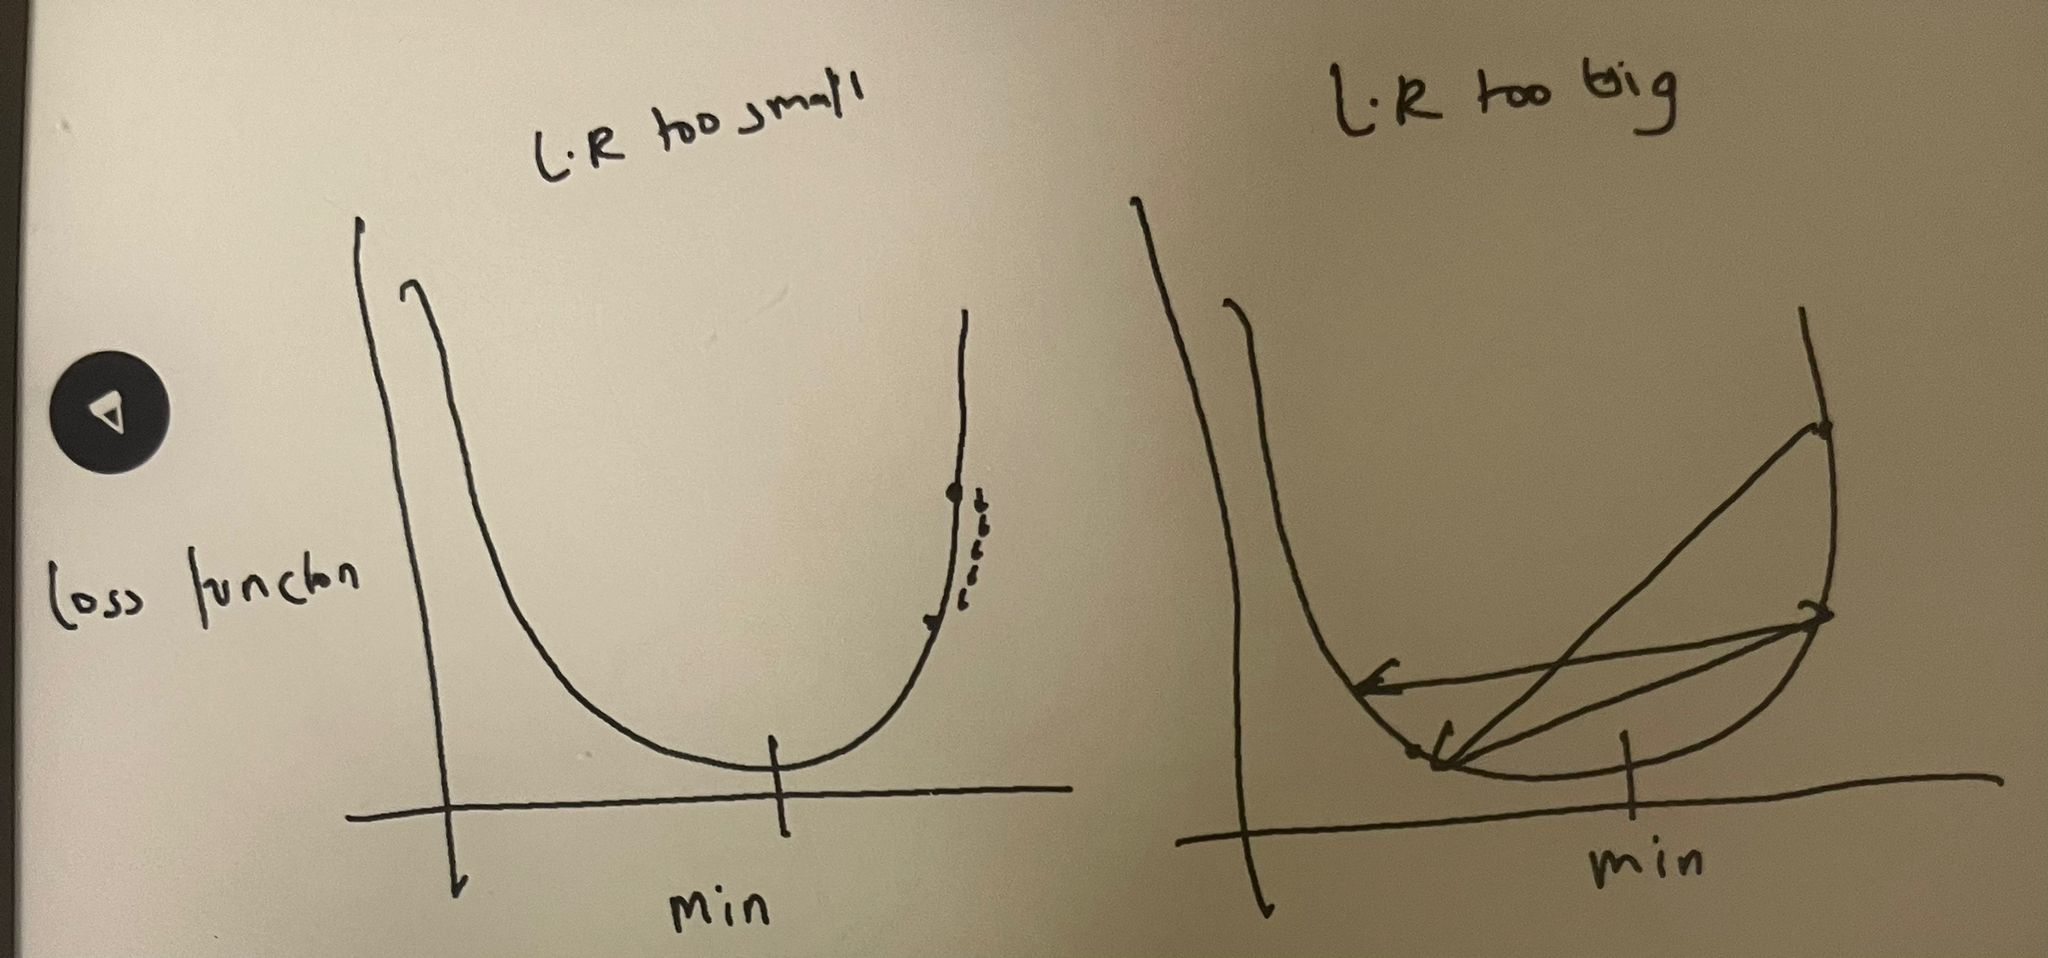


In [ ]:
# TEMPLATE FOR UPDATING PARAMETERS:
import numpy as np

# Randomly generated input dataset of dimension 3x1: all inputs look like [[1],[1],[1]] or a column vector
import torch
dataset = []
for _ in range(1000):
    tensor = np.random.rand(3, 1)
    dataset.append(torch.tensor(tensor, dtype=torch.float32)) # Convert to PyTorch tensor


# Now 'dataset' contains approximately 1000 tensors of shape (3, 1)
print(len(dataset))
dataset[0].shape

#TRAINING LOOP
epochs = 5

weights_layer_1 = torch.randn(2,3, requires_grad=True)
weights_layer_2 = torch.randn(1,2, requires_grad=True)
#number of updating cycles
for i in range(epochs):
  for data_point in dataset: ## if doing batch then use for data point in batch
    # Forward pass (example)
    output_layer_1 = torch.matmul(weights_layer_1, data_point)
    activated_layer1 = torch.relu(output_layer_1)
    output_layer_2 = torch.matmul(weights_layer_2, activated_layer1)


    # Loss calculation (example) - Replace with your actual loss function
    loss = torch.mean((output_layer_2 - torch.tensor(0.5))**2) # Example loss

    # Backpropagation
    loss.backward()

    # Update weights (example)
    with torch.no_grad():
        weights_layer_1 -= 0.01 * weights_layer_1.grad
        weights_layer_2 -= 0.01 * weights_layer_2.grad
        weights_layer_1.grad.zero_()
        weights_layer_2.grad.zero_()

  print(f"Epoch {i+1}, Loss: {loss.item()}")



1000
Epoch 1, Loss: 0.005916260648518801
Epoch 2, Loss: 0.00415960093960166
Epoch 3, Loss: 0.002602416556328535
Epoch 4, Loss: 0.0013841352192685008
Epoch 5, Loss: 0.000601094972807914


##  Softmax Activation for Classification tasks

- The softmax activation simply turns your input vector in a series of probabilities for each class that you're trying to predict for. I.e it squishes your output to 0-1 range.`

- Any ideas on how you would select one class out of the many different probabilities that you have for this example:

- softmax output = [0.001, 0.999, 0]

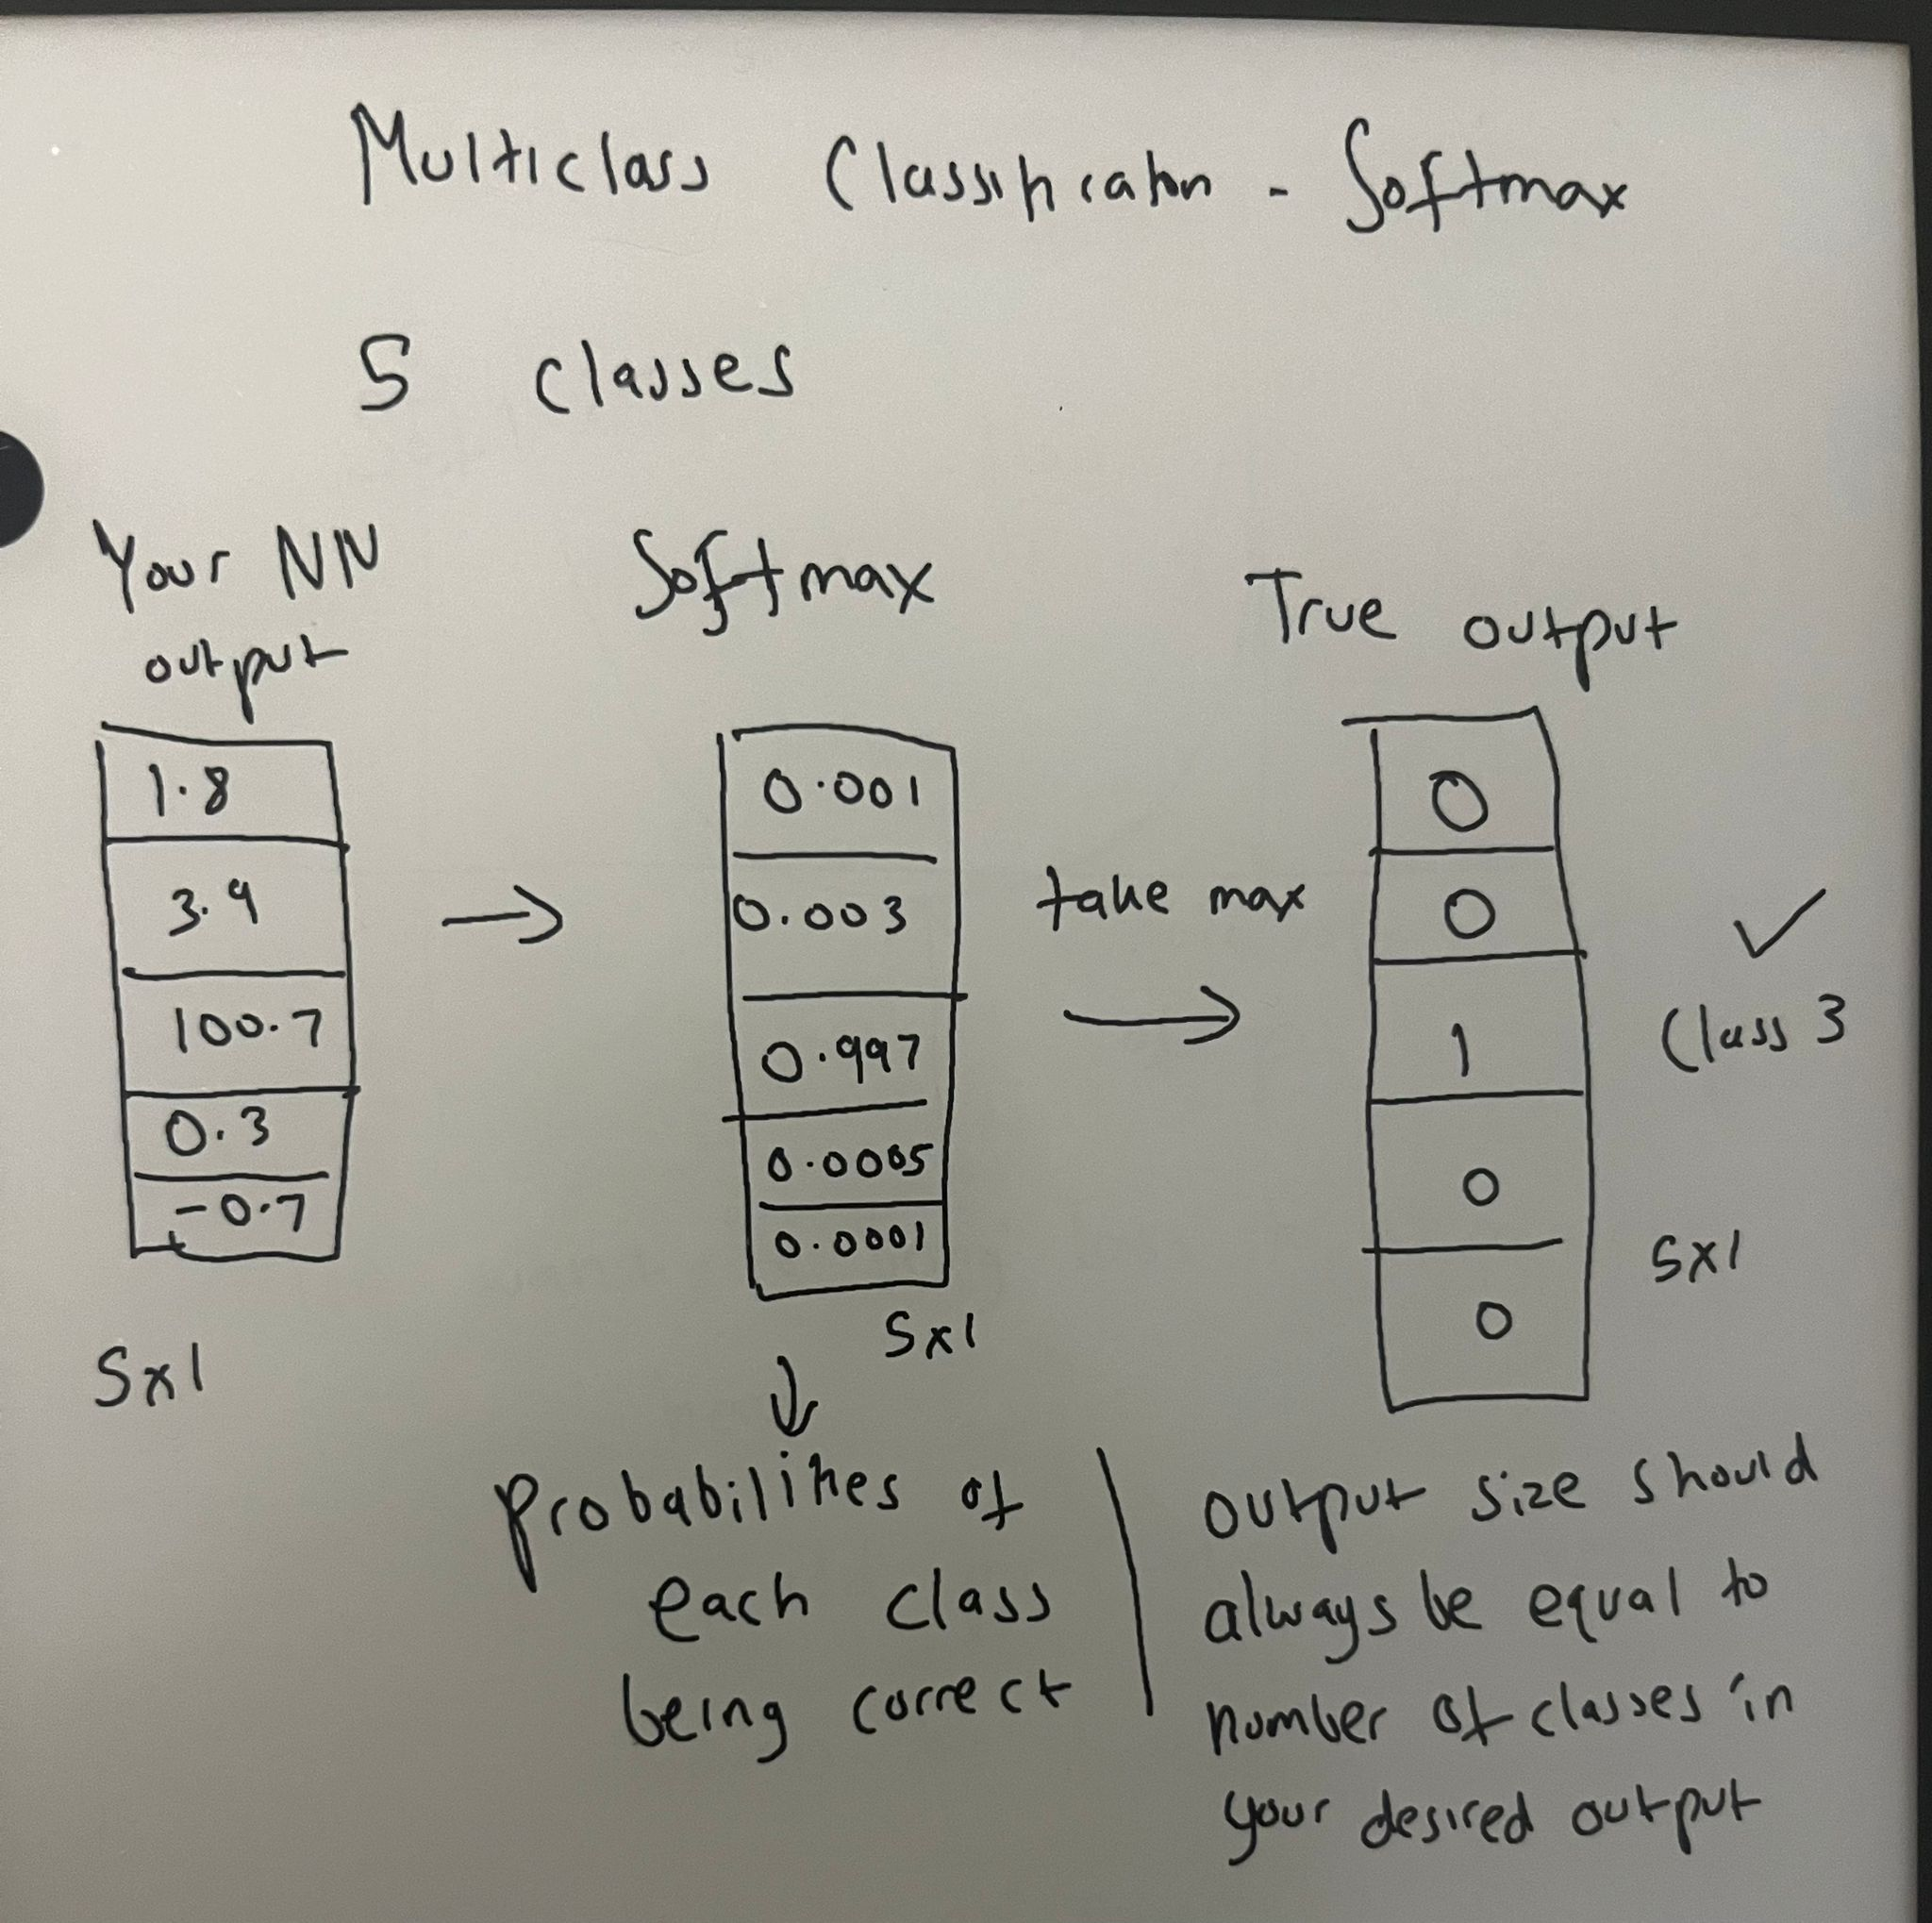

In [ ]:
#SOFTMAX ACTIVATION
import torch


# Example output tensor
output_tensor = torch.randn(5)  # Example: a tensor with 5 random values
print("Original Tensor:")
print(output_tensor)

# Apply sigmoid function
softmax = torch.softmax(output_tensor, dim = 0)
print("\nSoftmax Output:", softmax)


Original Tensor:
tensor([-0.4006,  1.1885,  0.4769, -0.8385, -0.4992])
\Softmax Output: tensor([0.1015, 0.4971, 0.2440, 0.0655, 0.0919])


## Stochastic Gradient Descent

Now in the previous example, we were calculating the loss over the entire dataset each time.

- There is a better tehcnique to do so.

- Instead of calulating loss over the entire batch each time, calculate it over a random sample from the dataset each time.

- Given enough epochs, your entire dataset will be seen once and you can avoid excess computation.

- This also allows us to avoid local minimas.

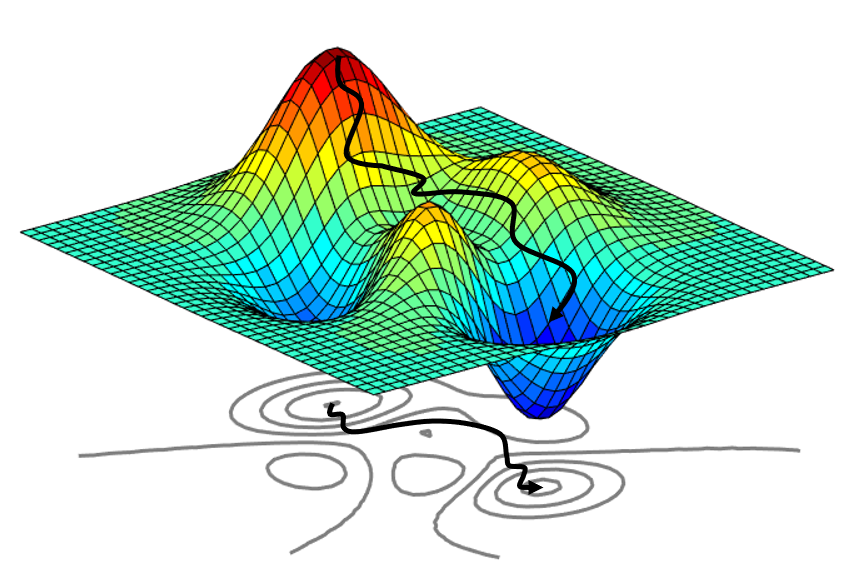

Now we can use this loss function to update our parameters.

## Training Example: Fashion MNIST

This dataset contains 28x28 gray scale images. Input dimension will be 784x1

60,000 total images.

T

In [ ]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms

# LOADING THE DATA
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

# Initialize weights for a simple 2-layer network (input -> hidden -> output)
input_size = 784  # Fashion MNIST images are 28x28
hidden_size = 128   # Hidden layer size, choose a power of 2 thats close to input size/8
output_size =  10    # Fashion MNIST has 10 classes

# Weights and biases
weights_layer_1 = torch.randn(hidden_size, input_size, requires_grad=True )
weights_layer_2 = torch.randn(output_size, hidden_size, requires_grad=True)

# Training loop parameters
epochs = 10
learning_rate = 0.01 # choose a value between 0.01 and 0.1

# Training loop
for epoch in range(epochs):
    for images, labels in train_loader:
        # Flatten the images from (32, 1, 28, 28) to (32, 784)
        images = images.view(images.size(0), -1)

        # Forward pass
        hidden_layer1 = torch.relu(torch.matmul(images, weights_layer_1.T))  # Transpose for correct dimension
        output_layer = torch.matmul(hidden_layer1, weights_layer_2.T)

        # Loss calculation using Cross-Entropy Loss (combines Softmax and NLL)
        loss = F.cross_entropy(output_layer, labels)

        # Backpropagation
        loss.backward()

        # Update weights
        with torch.no_grad():
            weights_layer_1 -= learning_rate * weights_layer_1.grad
            weights_layer_2 -= learning_rate * weights_layer_2.grad

            # Zero gradients after updating
            weights_layer_1.grad.zero_()
            weights_layer_2.grad.zero_()


    # Print loss for each epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


Epoch 1/10, Loss: 5.533334732055664
Epoch 2/10, Loss: 3.060321569442749
Epoch 3/10, Loss: 0.8901870250701904
Epoch 4/10, Loss: 1.0053234100341797
Epoch 5/10, Loss: 1.3068809509277344
Epoch 6/10, Loss: 1.2825603485107422
Epoch 7/10, Loss: 0.4636768698692322
Epoch 8/10, Loss: 0.9994716048240662
Epoch 9/10, Loss: 2.187114715576172
Epoch 10/10, Loss: 1.0108836889266968


tensor([1.4187e-05, 1.1770e-37, 3.4764e-02, 1.8437e-10, 9.5039e-01, 2.7807e-34,
        1.4827e-02, 5.6122e-42, 3.5116e-06, 1.3493e-38],
       grad_fn=<SoftmaxBackward0>)


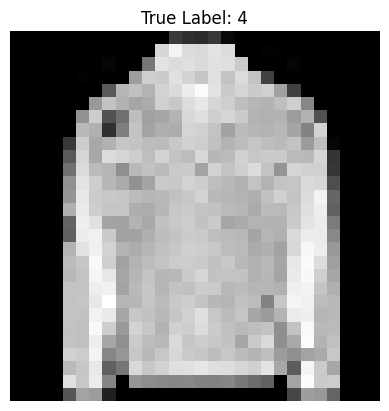

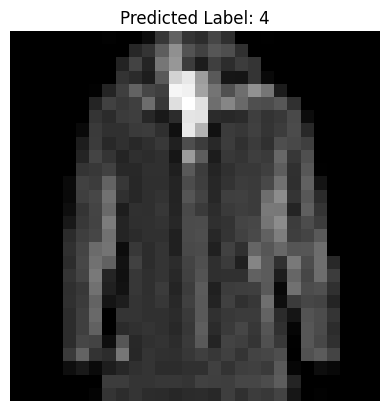

True Label: 4, Predicted Label: 4


In [ ]:
import matplotlib.pyplot as plt

# PREMADE FUNCTION TO DISPLAY THE PREDICTED IMAGE AND INPUT IMAGE TO SEE IF THEY ARE THE SAME
def predict_and_display(index, dataset, weights_layer_1, weights_layer_2):
    # get img and label from dataset
    image, label = dataset[index]

    # flatten the image from 28x28 to 1 x784
    image_flattened = image.view(-1)  # Reshape to (784,)

    # forward pass
    hidden_layer1 = torch.relu(torch.matmul(image_flattened, weights_layer_1.T))  # Transpose for correct dimension
    output_layer = torch.matmul(hidden_layer1, weights_layer_2.T)

    #  softmax to get probabilities for each class
    probabilities = F.softmax(output_layer, dim=0)

    # predicted label is the class with the highest probability
    predicted_label = torch.argmax(probabilities).item()
    print(probabilities)
    # display the input image
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"True Label: {label}")
    plt.axis('off')

    for img, lbl in dataset:
        if lbl == predicted_label:  # find an image with the predicted label
            predicted_image = img
            break
    plt.show()
    # display the predicted image with its predicted label

    plt.imshow(predicted_image.squeeze(), cmap='gray')  # Display the predicted image
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')  # Turn off axis
    plt.show()

    # print both the true and predicted labels
    print(f"True Label: {label}, Predicted Label: {predicted_label}")

# Example usage
index_to_predict = 29  # Change this to test with different images
predict_and_display(index_to_predict, train_data, weights_layer_1, weights_layer_2)
